# VERITASAI PROJECT

### Task

> Try building a model that predicts the likelihood of specific diseases based on input symptoms. 
> Use labeled medical datasets and implement algorithms like decision trees or support vector machines. 

### About Dataset

This heart disease dataset contains medical and demographic information about patients, focusing on features commonly associated with cardiovascular health. It includes data on age, gender, chest pain type, blood pressure, cholesterol levels, and other clinical indicators such as heart rate and electrocardiographic results. The **target** column indicates the presence or absence of heart disease. This dataset is used to analyze risk factors and build models for predicting heart disease based on patient data.

### Columns Definition

- age: Age of the patient in years.
- sex: Gender of the patient (often encoded as 1 for male and 0 for female).
- cp (chest pain type): Type of chest pain experienced, usually coded into categories (e.g., 1 for typical angina, 2 for atypical angina, 3 for non-- anginal pain, 4 for asymptomatic).
- trestbps (resting blood pressure): Resting blood pressure in mm Hg at the time of admission.
- chol (serum cholesterol): Serum cholesterol level in mg/dL.
- fbs (fasting blood sugar): Fasting blood sugar > 120 mg/dL (1 = true; 0 = false).
- restecg (resting electrocardiographic results): Results of the ECG (e.g., 0 = normal, 1 = ST-T wave abnormality, 2 = probable or definite left ventricular hypertrophy).
- thalach (maximum heart rate achieved): Maximum heart rate achieved during physical exertion.
- exang (exercise induced angina): Exercise-induced chest pain (1 = yes; 0 = no).
- oldpeak: ST depression induced by exercise relative to rest, which reflects the severity of ischemia.
- slope (slope of the ST segment): The slope of the peak exercise ST segment (e.g., 1 = upsloping, 2 = flat, 3 = downsloping).
- ca (number of major vessels): Number of major vessels (0–3) colored by fluoroscopy.
- thal (thalassemia): Type of blood disorder, often encoded (e.g., 3 = normal, 6 = fixed defect, 7 = reversible defect).


# IMPORTING NECESSARY LIBRARIES

In [34]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')

import sklearn
from sklearn import model_selection
from sklearn.model_selection import (train_test_split, 
    KFold, 
    cross_val_score, 
    StratifiedKFold, 
    learning_curve, 
    GridSearchCV
)

from sklearn.metrics import (
    confusion_matrix, 
    make_scorer, 
    accuracy_score, 
    classification_report
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## EXPLORATORY DATA ANALYSIS (EDA)

In [20]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Checking for missing values

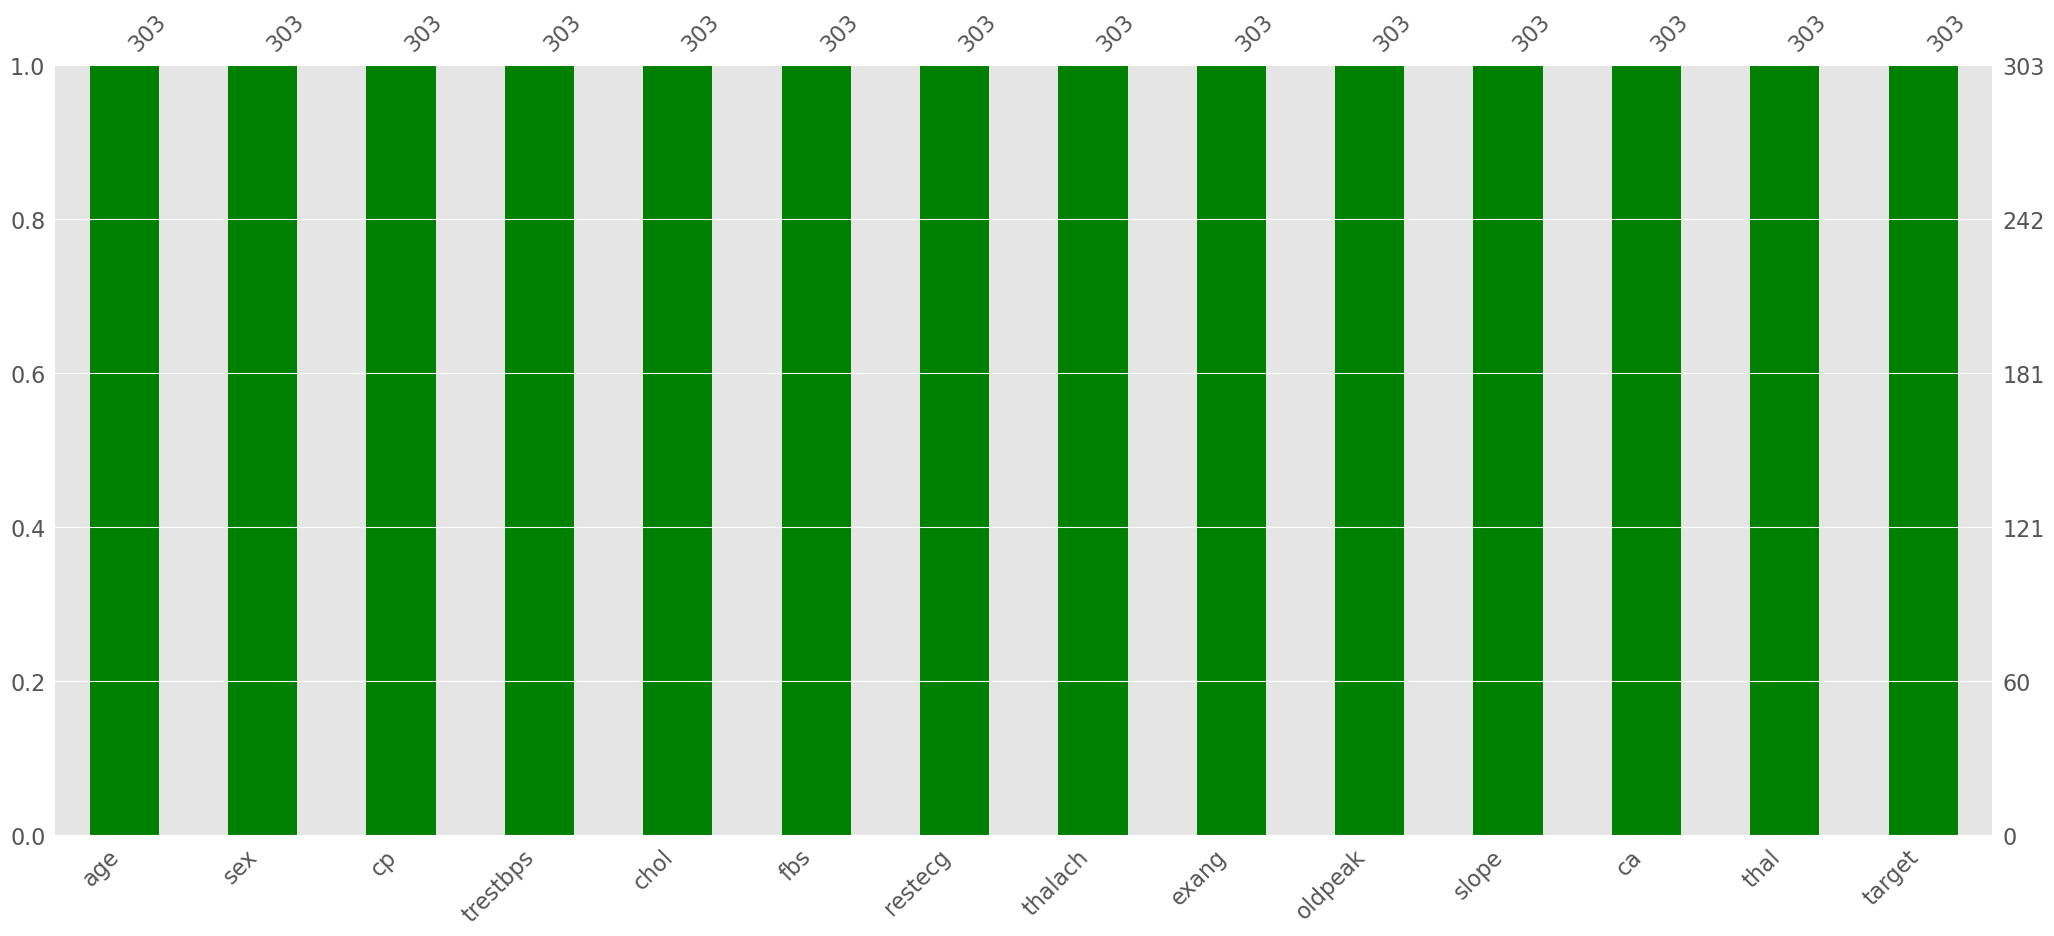

In [8]:
msno.bar(df, color="green") 

plt.show()

# no missing values

In [10]:
#statistical description of columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


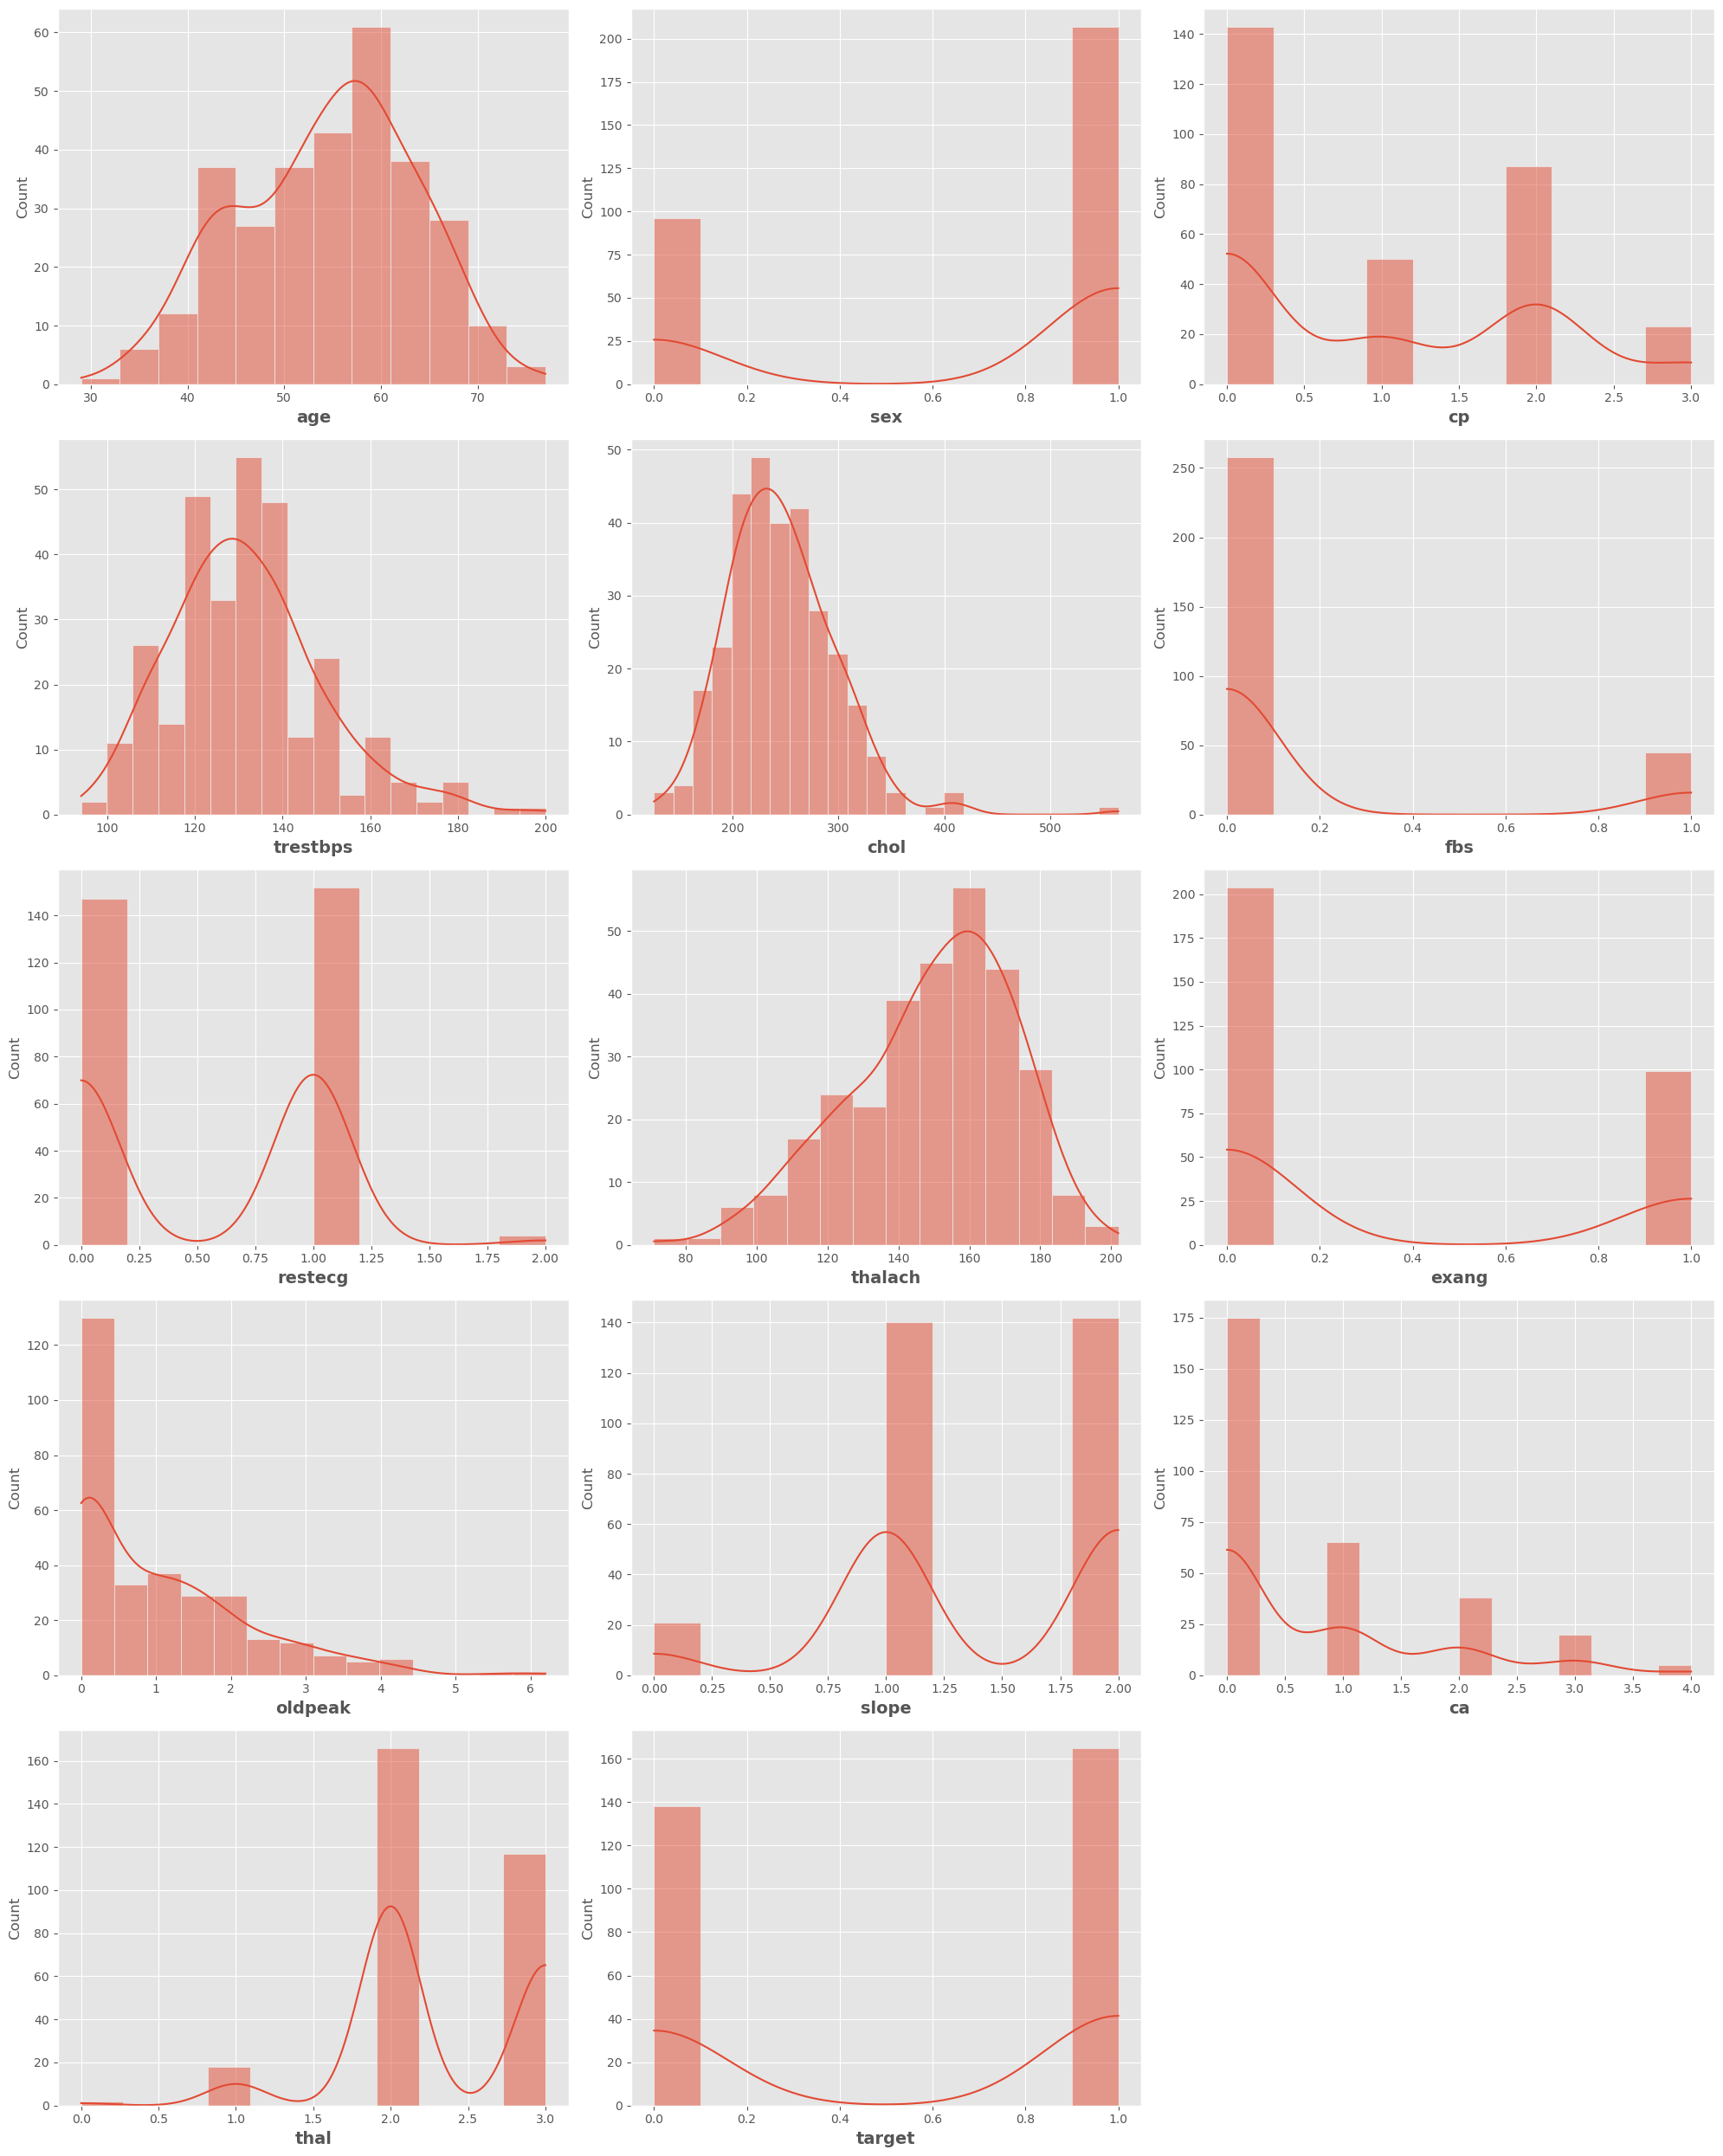

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 25))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 3, plotnumber)
        sns.histplot(df[column], kde=True)  
        plt.xlabel(column, fontsize=14, fontweight='bold')  
    plotnumber += 1

plt.tight_layout()
plt.show()

# Dataset is relatively balanced

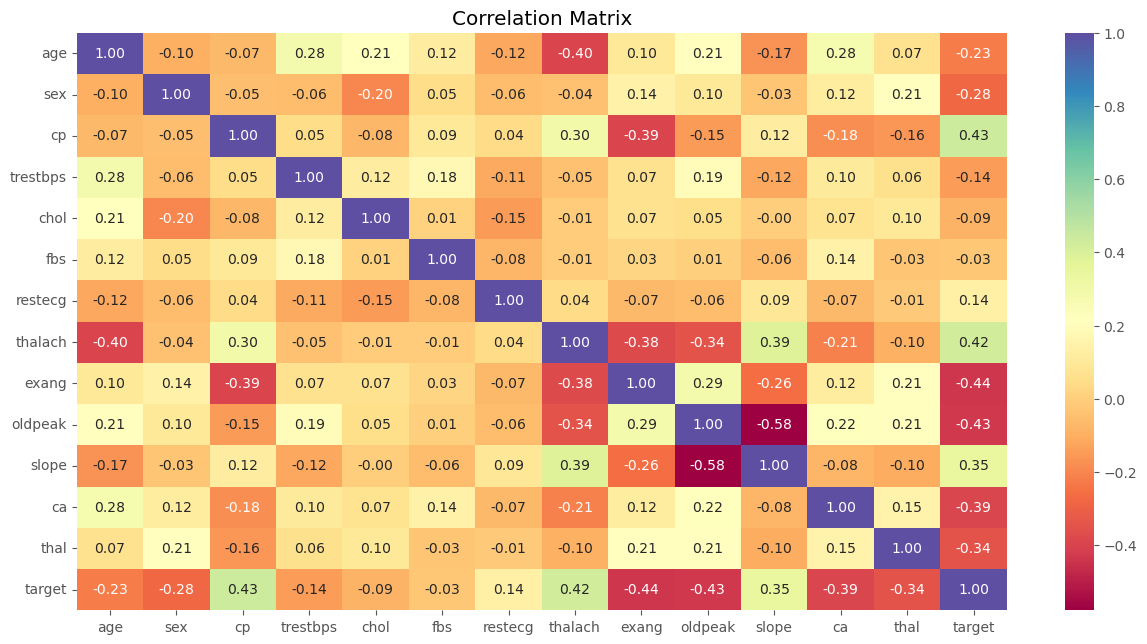

In [15]:
numerical_features = df.select_dtypes(include='number').columns
plt.figure(figsize=(15, 7.5))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# plot the heatmap to check correlation value of data in the columns to the target column

## DATA PRE-PROCESSING 


In [21]:
#Drop columns with correlation value of less than 0.1 to the target column

# Calculate correlation matrix
correlation_matrix = df.corr()

# Drop columns with correlation less than 0.1 with the target
columns_to_drop = correlation_matrix[(correlation_matrix['target'] < 0.1) & (correlation_matrix['target'] > -0.1)].index
df = df.drop(columns=columns_to_drop)

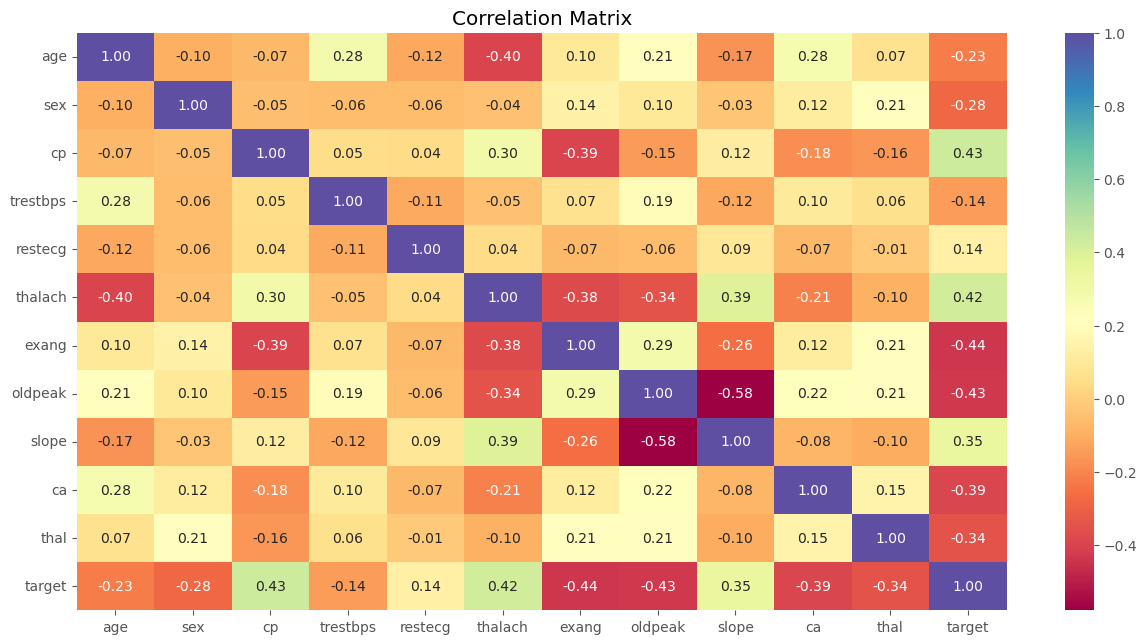

In [22]:
numerical_features = df.select_dtypes(include='number').columns
plt.figure(figsize=(15, 7.5))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## MODELLING

In [26]:
X, y = df.drop("target", axis=1), df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Support Vector Classifier (SVC)**

In [31]:
# Initialize the model
svc_clf = SVC()

# Fit the model to the training data
svc_clf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_svc = svc_clf.predict(X_test_scaled)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')

print(f"Support Vector Classifier:\n Accuracy: {accuracy_svc:.4f}\n F1 Score: {f1_svc:.4f}\n")

Support Vector Classifier:
 Accuracy: 0.8696
 F1 Score: 0.8693



# **Decision Tree Classifier**

In [32]:
# Initialize the model
tree_clf = DecisionTreeClassifier()

# Fit the model to the training data
tree_clf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_tree = tree_clf.predict(X_test_scaled)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

print(f"Decision Tree Classifier:\n Accuracy: {accuracy_tree:.4f}\n F1 Score: {f1_tree:.4f}\n")

Decision Tree Classifier:
 Accuracy: 0.8261
 F1 Score: 0.8248



# Hyperparameter Tuning for Support Vector Classifier (SVC)

In [48]:
# Define the model
svc_clf = SVC()  # Default kernel is 'rbf'

# Define the grid of hyperparameters to search
param_grid = {
    'C': np.logspace(-4, 4, 30),  # More values for C
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Different kernels
    'gamma': ['scale', 'auto'],  # Kernel coefficient options
    'max_iter': [100, 200, 300, 400]  # Maximum number of iterations
}

# Set up the GridSearchCV to optimize for accuracy score
grid_search = GridSearchCV(estimator=svc_clf, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

# Print Accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 960 candidates, totalling 4800 fits
Best Hyperparameters: {'C': 2.592943797404667, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 400}
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       0.88      0.91      0.89        23

    accuracy                           0.89        46
   macro avg       0.89      0.89      0.89        46
weighted avg       0.89      0.89      0.89        46

Accuracy Score: 0.8913043478260869


# Hyperparameter Tuning for Decision Tree Classifier

In [37]:
# Define the model
tree_clf = DecisionTreeClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split quality metrics
    'max_depth': [None, 10, 20, 30, 40, 50],  # Depth of the tree
    'min_samples_split': [2, 5, 10, 20],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5, 10]  # Minimum samples at a leaf node
}

# Set up the GridSearchCV to optimize for accuracy score
grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

# Print Accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 20}
              precision    recall  f1-score   support

           0       0.80      0.70      0.74        23
           1       0.73      0.83      0.78        23

    accuracy                           0.76        46
   macro avg       0.77      0.76      0.76        46
weighted avg       0.77      0.76      0.76        46

Accuracy Score: 0.7608695652173914


###  Best Model: Support Vector Machine

# Cross Validation using SVC

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the SVC model with the best hyperparameters
svc_clf = SVC(
    C=2.592943797404667,
    gamma='scale',
    kernel='linear',
    max_iter=400
)

# Perform 5-fold cross-validation and evaluate using accuracy
cv_scores = cross_val_score(svc_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Cross-Validation Accuracy: {mean_cv_score:.4f} ± {std_cv_score:.4f}")

Cross-Validation Accuracy: 0.8405 ± 0.0335


In [50]:
import joblib

# Fit the model first
svc_clf.fit(X_train_scaled, y_train)

# Save the model to a file
joblib.dump(svc_clf, 'svc_model.joblib')

print("Model saved as 'svc_model.joblib'")

Model saved as 'svc_model.joblib'


# Model Deployment: Streamlit

In [46]:
with open("Heart_Disease_Prediction.py", "w") as file:
    file.write('''
import streamlit as st
import joblib
import numpy as np

# Load the saved model
model = joblib.load('svc_model.joblib')

# Streamlit app title
st.title("Heart Disease Prediction with SVC")

# Collect user input for each feature
age = st.number_input("Age", min_value=0, max_value=120, value=30)
sex = st.selectbox("Sex", options=["Male", "Female"])
cp = st.selectbox("Chest Pain Type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)", options=[1, 2, 3, 4])
trestbps = st.number_input("Resting Blood Pressure (mm Hg)", min_value=80, max_value=200, value=120)
restecg = st.selectbox("Resting ECG Results (0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy)", options=[0, 1, 2])
thalach = st.number_input("Maximum Heart Rate Achieved", min_value=60, max_value=220, value=150)
exang = st.selectbox("Exercise Induced Angina", options=[0, 1], format_func=lambda x: 'Yes' if x == 1 else 'No')
oldpeak = st.number_input("ST Depression Induced by Exercise Relative to Rest", min_value=0.0, max_value=6.0, value=1.0, step=0.1)
slope = st.selectbox("Slope of the Peak Exercise ST Segment (0: upsloping, 1: flat, 2: downsloping)", options=[0, 1, 2])
ca = st.selectbox("Number of Major Vessels Colored by Fluoroscopy (0-4)", options=[0, 1, 2, 3, 4])
thal = st.selectbox("Thalassemia (1: normal, 2: fixed defect, 3: reversible defect)", options=[1, 2, 3])

# Convert categorical inputs to numerical if necessary
sex = 1 if sex == "Male" else 0

# Create feature array for prediction
features = np.array([[age, sex, cp, trestbps, restecg, thalach, exang, oldpeak, slope, ca, thal]])

# Prediction
if st.button("Predict"):
    prediction = model.predict(features)
    if prediction[0] == 1:
        st.write("The model predicts the presence of heart disease.")
    else:
        st.write("The model predicts no heart disease.")
''')